In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/Twitter/

/content/drive/MyDrive/Twitter


In [8]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.2 MB/s 


In [9]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
from collections import Counter
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df = pd.read_csv('labeled_data.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [11]:
# to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
#Removing greek characters 
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
#Removing 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [12]:
#removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [13]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [14]:
#Removing stopwords
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [15]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [16]:
#Stemming
ps = PorterStemmer()
adwait = df
#adwait.head()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [17]:
#Tokenization
corpus = []
for i in range(0,len(df)):
    tweet = df['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

Hate words


(-0.5, 799.5, 499.5, -0.5)

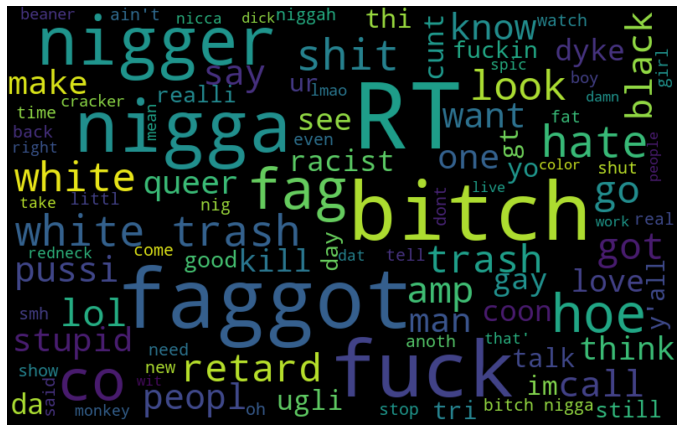

In [18]:
hate_words = ' '.join([word for word in df['clean_tweet'][df['class'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(hate_words)
print('Hate words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Offensive words


(-0.5, 799.5, 499.5, -0.5)

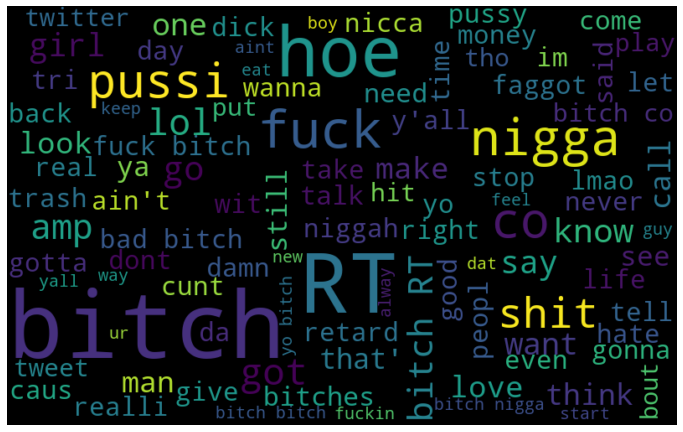

In [19]:
offensive_words = ' '.join([word for word in df['clean_tweet'][df['class'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(offensive_words)
print('Offensive words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

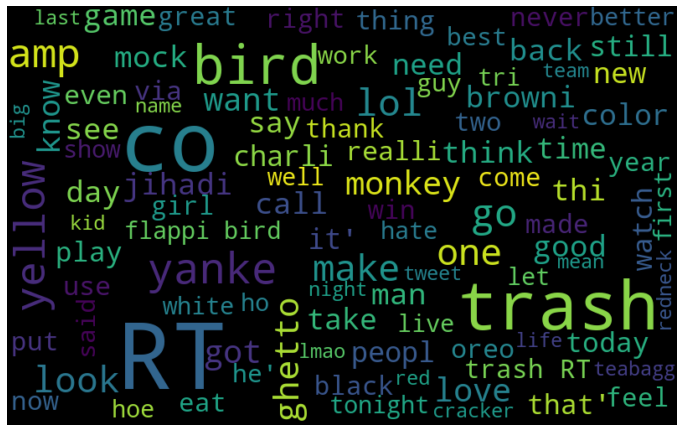

In [20]:
normal_words = ' '.join([word for word in df['clean_tweet'][df['class'] == 2]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

## ML Models

In [21]:
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'class'].values

In [22]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['clean_tweet'], df['class'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['class'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'class'].values

In [23]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest', RandomForestClassifier())])
random_forest.fit(X1_train, Y1_train)
y_pred = random_forest.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))
print("Accuracy",accuracy_score(Y1_test, y_pred))

Predicted   0     1    2
Actual                  
0          59   343   27
1          34  5600  123
2           5   291  953
              precision    recall  f1-score   support

           0       0.60      0.14      0.22       429
           1       0.90      0.97      0.93      5757
           2       0.86      0.76      0.81      1249

    accuracy                           0.89      7435
   macro avg       0.79      0.62      0.66      7435
weighted avg       0.88      0.89      0.87      7435

Accuracy 0.8893073301950235


In [24]:
# decision tree classifier
from sklearn import tree
decision_tree_clf = Pipeline([('tfidf', TfidfVectorizer()), ('dct', tree.DecisionTreeClassifier())])
decision_tree_clf.fit(X1_train, Y1_train)
predict_dt = decision_tree_clf.predict(X1_test)
print(classification_report(Y1_test, predict_dt))
print("Accuracy",accuracy_score(Y1_test, predict_dt))

              precision    recall  f1-score   support

           0       0.28      0.24      0.26       429
           1       0.92      0.93      0.93      5757
           2       0.85      0.85      0.85      1249

    accuracy                           0.88      7435
   macro avg       0.69      0.68      0.68      7435
weighted avg       0.88      0.88      0.88      7435

Accuracy 0.8804303967720242


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = Pipeline([('tfidf', TfidfVectorizer()), ('gbc', GradientBoostingClassifier())]) 
grad_boost_clf.fit(X1_train, Y1_train)
predict_grad = grad_boost_clf.predict(X1_test)
print(classification_report(Y1_test, predict_grad))
print("Accuracy",accuracy_score(Y1_test, predict_grad))

              precision    recall  f1-score   support

           0       0.49      0.22      0.30       429
           1       0.90      0.96      0.93      5757
           2       0.85      0.76      0.80      1249

    accuracy                           0.88      7435
   macro avg       0.75      0.65      0.68      7435
weighted avg       0.87      0.88      0.87      7435

Accuracy 0.8845998655010088
